# Viral Tweets

In this project, I am going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

Some of these features are dictionaries. For example, the feature `"user"` is a dictionary. We might want to use some of the information found in these sub-dictionaries.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

all_tweets = pd.read_json("random_tweets.json", lines=True)

#print(len(all_tweets))
print(all_tweets.columns)
#print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]["user"])
#print(all_tweets.loc[0]["user"]["location"])

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_

# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, I need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; I'll need to make it myself.

So how do I define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. Let's say I wanted to create a column called `is_viral` that is a `1` if the tweet had more than the median number of retweets and `0` otherwise.

In [9]:
all_tweets["retweet_count"]
print(all_tweets["retweet_count"].median())
all_tweets["is_viral"] = np.where(all_tweets.retweet_count > 13.0, 1, 0)
print(all_tweets["is_viral"])

13.0
0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64


# Making Features

Now that I've created a label for every tweet in the dataset, I can begin thinking about which features might determine whether a tweet is viral. I can create new columns in our dataset to represent these features.

In [10]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets["hastags_count"] = all_tweets.apply(lambda tweet: tweet['text'].count("#"), axis=1)
all_tweets["links_count"] = all_tweets.apply(lambda tweet: tweet["text"].count("http"), axis =1)
all_tweets["words_count"] = all_tweets.apply(lambda tweet: len(tweet["text"].split(" ")), axis=1)

# Normalizing The Data

I've now made the columns that I want to feed into the classifier. Let's get rid of all the data that is no longer relevant. Creating a variable named `labels` and set it equal to the `'is_viral'` column of all_tweets, and create a variable named `data` and set it equal to all of the columns that I created in the last step.

Now I create a new variable named `scaled_data`. `scaled_data` should be the result of the `scale` function with `data` as a parameter. Including the parameter `axis = 0`. This scales the *columns* as opposed to the rows.

The scale function will normalize the data so all of the features will vary within the same range.

In [11]:
labels = all_tweets["is_viral"]
features = all_tweets[['tweet_length', 'followers_count', 'friends_count', "hastags_count", "links_count", "words_count"]]

scaled_features = scale(features, axis=0)
print(scaled_features[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.32045057 -0.78415588  1.15749167]


# Creating the Training Set and Test Set

To evaluate the effectiveness of the classifier, I now split `scaled_data` and `labels` into a training set and test set using scikit-learn's `train_test_split` function. This function takes two required parameters: It takes the data, followed by the labels. I set the optional parameter `test_size` to be `0.2`. Ans also the `random_state` parameter so the code will randomly split the data in the same way. I used `random_state = 1`.

In [12]:
train_X, test_X, train_y, test_y = train_test_split(scaled_features, labels, test_size=0.2, random_state=1)

# Using the Classifier

I can finally use the K-Nearest Neighbor classifier. Let's test it using `k = 5`. By creating a `KNeighborsClassifier` object named `classifier` with the parameter `n_neighbors` equal to `5`.

Next, I train the `classifier` by calling the `.fit()` method with `train_data` and `train_labels` as parameters.

Finally, let's test the model! Calling `classifier`'s `.score()` method using `test_data` and `test_labels` as parameters.

In [14]:
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(train_X, train_y)
score = classifier.score(test_X, test_y)
print(score)

0.7243243243243244


# Choosing K

I've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

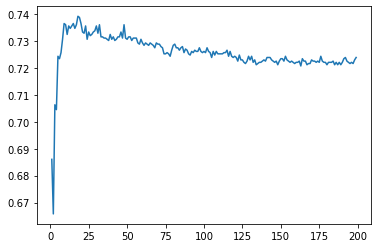

In [15]:
scores = []
for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_X, train_y)
    scores.append(classifier.score(test_X, test_y))

plt.plot(range(1,200), scores)
plt.show()